# Filter Warnings 

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Reading Data Set 

In [2]:
import pandas as pd
LoanData = pd.read_csv("F:/Course/Pandas/Csv/Loan_Approval_Data.csv")

# Defining Problem Statement :

Create a Predictive model which can tell weather to approve a loan application or not?

Target Variable: Loan_Status

Predictors: Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome etc.

Loan_Status="N" means the loan was rejected.

Loan_Status="Y" means the loan was approved.

# Basic Data Exploration

head() : This helps to see a few sample rows of the data 

info() : This provides the summarized information of the data 

describe() : This provides the descriptive statistical details of the data 

nunique(): This helps us to identify if a column is categorical or continuous 

In [3]:
LoanData.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
LoanData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
LoanData.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
LoanData.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Dropping Unwanted Column

As columns Loan_ID has all unique values it will not play important role in prediction

In [7]:
#Dropping Loan_ID column
LoanData = LoanData.drop(labels='Loan_ID',axis=1)

In [8]:
#Checking if column is dropped
LoanData.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dropping any duplicates values from Data

In [9]:
# Printing Data Shape before dropping Dupblicates
print("Shape of data before dropping duplicates values : ",LoanData.shape)
# Printing Data Shape after dropping Dupblicates
LoanData = LoanData.drop_duplicates()
print("Shape of data after dropping duplicates values : ",LoanData.shape)

Shape of data before dropping duplicates values :  (614, 12)
Shape of data after dropping duplicates values :  (614, 12)


Data Shows their are no duplicates values

# Looking at Distribution of target variable

<AxesSubplot:xlabel='Loan_Status'>

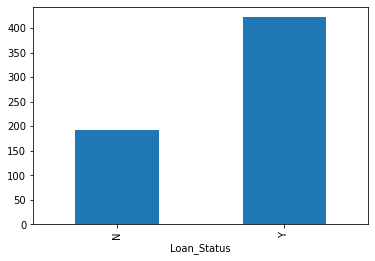

In [10]:
# As our target variable is categorical we plot a bar chart to look at distribution
groupData = LoanData.groupby('Loan_Status').size()
groupData.plot(kind='bar')

# Finding Unsual Data

In [11]:
for i in LoanData.columns:
    print(LoanData[i].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
No     500
Yes     82
Name: Self_Employed, dtype: int64
2500    9
6000    6
2600    6
4583    6
4166    5
       ..
5503    1
3450    1
2425    1
2423    1
4095    1
Name: ApplicantIncome, Length: 505, dtype: int64
0.0       273
2500.0      5
2083.0      5
1666.0      5
1625.0      3
         ... 
2365.0      1
1695.0      1
2466.0      1
2375.0      1
1700.0      1
Name: CoapplicantIncome, Length: 287, dtype: int64
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
211.0     1
250.0     1
62.0      1
85.0      1
436.0     1
Name: LoanAmount, Length: 203, dtype: int64
360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtyp

From above observation we can see that in column Dependents we have unsual value like 3+ in data 

So Replcating that value with 3

In [12]:
LoanData["Dependents"] = LoanData["Dependents"].replace(["3+"],3)

In [13]:
#checking if values are properly replcaed
LoanData["Dependents"].value_counts()

0    345
1    102
2    101
3     51
Name: Dependents, dtype: int64

# Visual Data Exploratory Data Analysis

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots

In [14]:
#Seperating continous and categorical columns
cat = []
con = []

for i in LoanData.columns:
    if (LoanData[i].dtypes == "object"):
        cat.append(i)
    else:
        con.append(i)

In [15]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [16]:
con

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [17]:
cat.append('Credit_History')

In [18]:
con.remove('Credit_History')

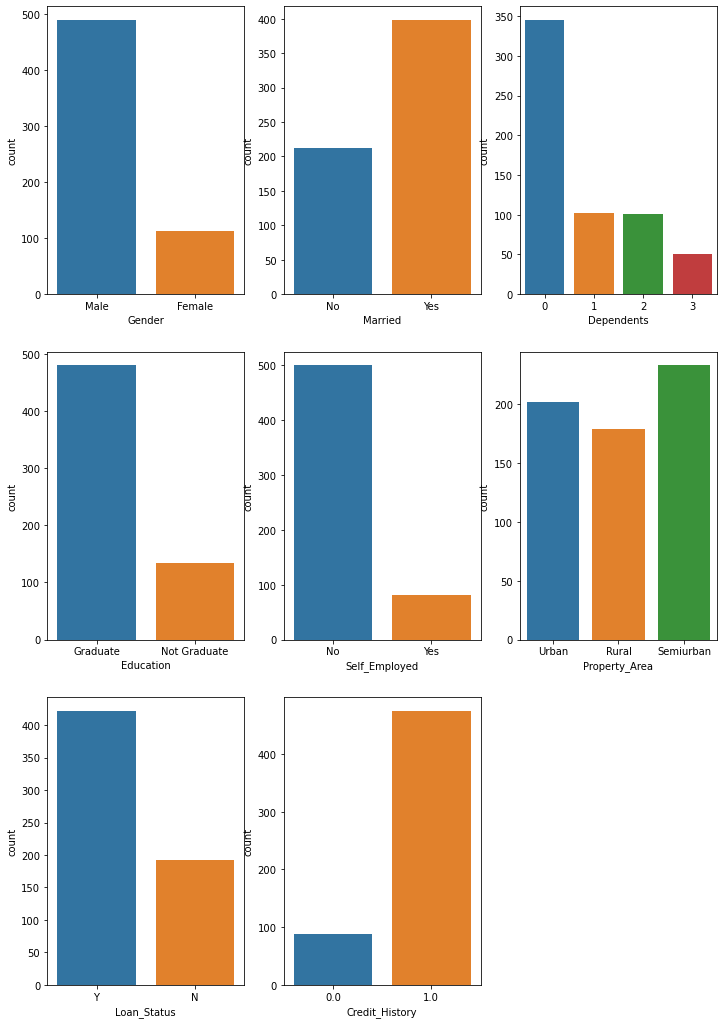

In [19]:
#plotting Bar chart for categorical columns / plotting count plot
import matplotlib.pyplot as plt
import seaborn as sb
from seaborn import countplot
from seaborn import displot

plt.figure(figsize=(12,18))
x = 1
for i in cat:
    plt.subplot(3,3,x)
    countplot(LoanData[i])
    x = x+1

# Visualize distribution of all the Continuous Predictor variables in the data using histograms

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>]], dtype=object)

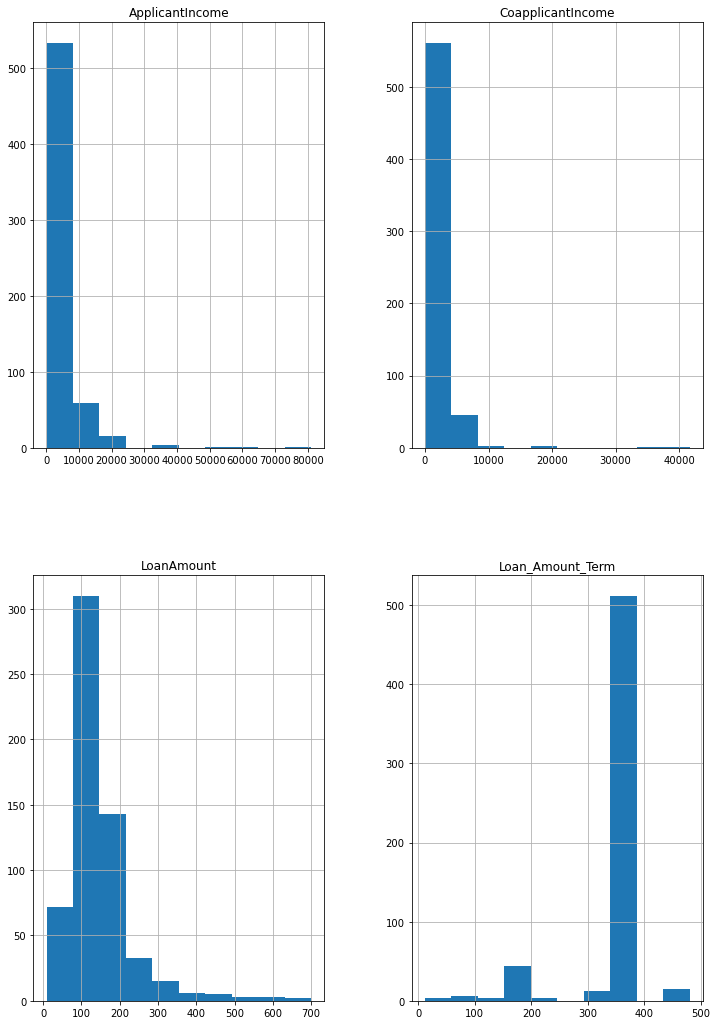

In [20]:
LoanData.hist(con,figsize=(12,18))

# Missing Data Treatment

In [21]:
#checking if their are any missing data
LoanData.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [22]:
#replcaing missing data for categrical columns with mode of that categorical column
#replcaing missing data for continous columns with mean of that continous column
for i in cat:
    x = LoanData[i].mode()[0]
    LoanData[i] = LoanData[i].fillna(x)
for i in con:
    x = LoanData[i].mean()
    LoanData[i] = LoanData[i].fillna(x)

In [23]:
#Verifying if missing data is replaced
LoanData.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Missing Data is replcaed.

# Visualize distribution of all the Categorical Predictor variables in the data using bar plots after Missing Data Treatment

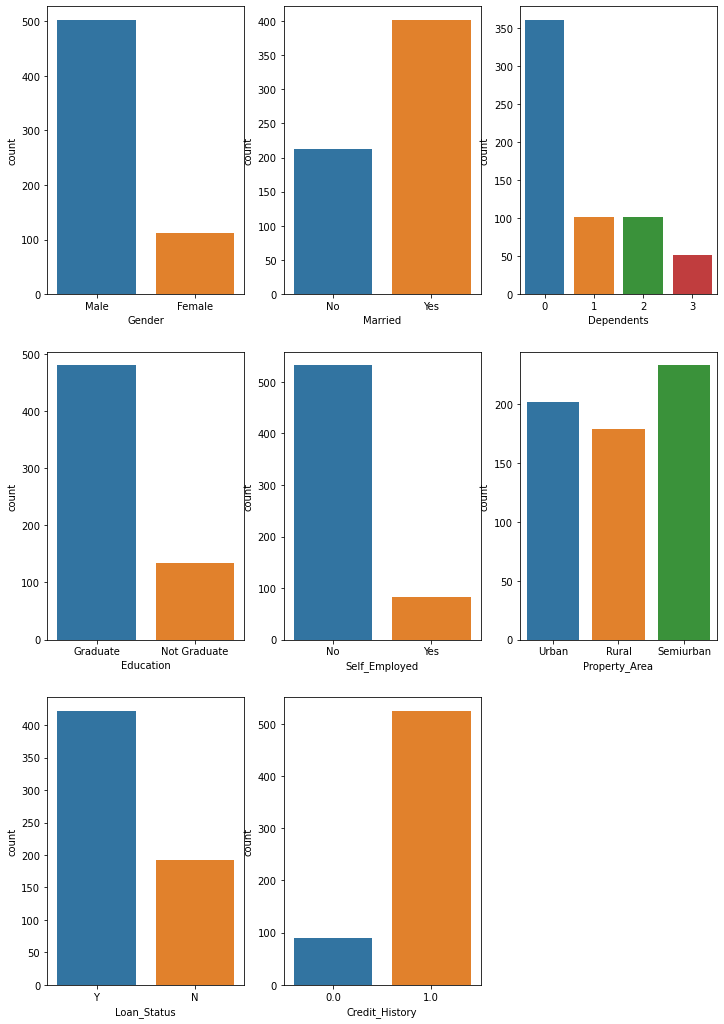

In [24]:
plt.figure(figsize=(12,18))
x = 1
for i in cat:
    plt.subplot(3,3,x)
    countplot(LoanData[i])
    x = x + 1

# Visualize distribution of all the Continuous Predictor variables in the data using histograms after Missing Data Treatment

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>]], dtype=object)

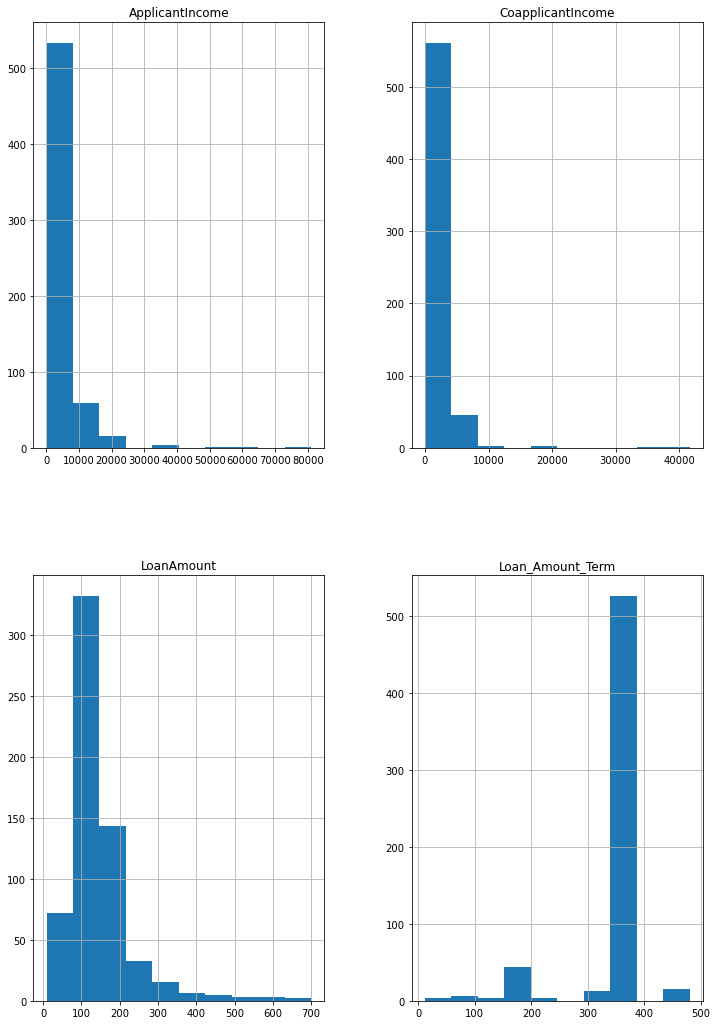

In [25]:
LoanData.hist(con,figsize=(12,18))

# Visual exploration of relationship between variables

# Statistical measurement of relationship strength between variables

In [26]:
cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status',
 'Credit_History']

In [27]:
cat.remove("Loan_Status")

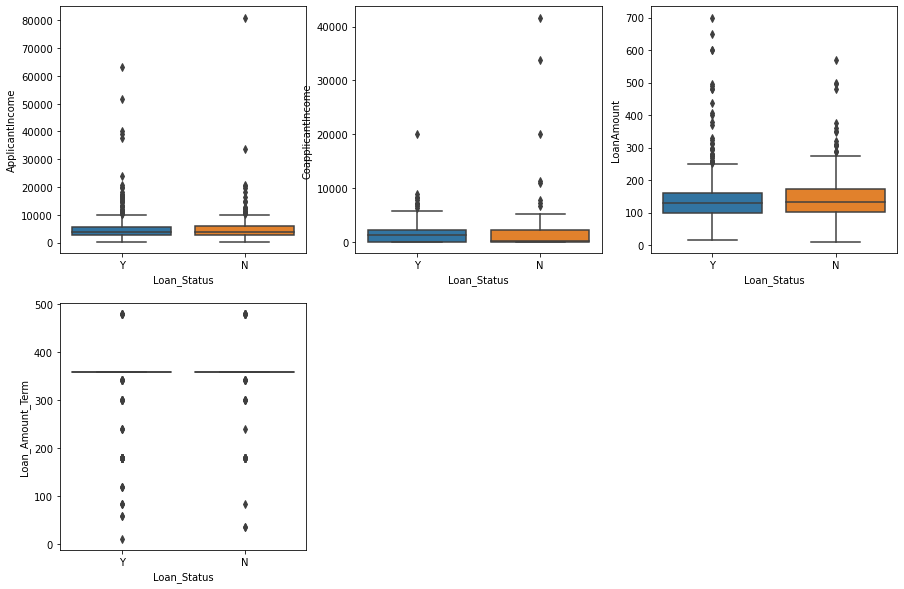

In [28]:
plt.figure(figsize=(15,10))
x = 1
for i in con:
    plt.subplot(2,3,x)
    sb.boxplot(LoanData["Loan_Status"],LoanData[i])
    x = x + 1

In [29]:
def FunctionAnova(inpData,TargetVariable,ContinousPredictors):
    from scipy.stats import f_oneway
    #creating list for selected columns
    SelectedPredictors = []
    for predictors in ContinousPredictors:
        ContinousPredictorsList = inpData.groupby(TargetVariable)[predictors].apply(list)
        AnovaResults = f_oneway(*ContinousPredictorsList)
    #seperating selected columns
        if (AnovaResults[1] < 0.05):
            print(predictors, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictors)
        else:
            print(predictors, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [30]:
con

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

In [31]:
FunctionAnova(inpData=LoanData,TargetVariable="Loan_Status",ContinousPredictors=con)

ApplicantIncome is NOT correlated with Loan_Status | P-Value: 0.907287812130378
CoapplicantIncome is NOT correlated with Loan_Status | P-Value: 0.1429482868428829
LoanAmount is NOT correlated with Loan_Status | P-Value: 0.36768764508192575
Loan_Amount_Term is NOT correlated with Loan_Status | P-Value: 0.6039634092405202


[]

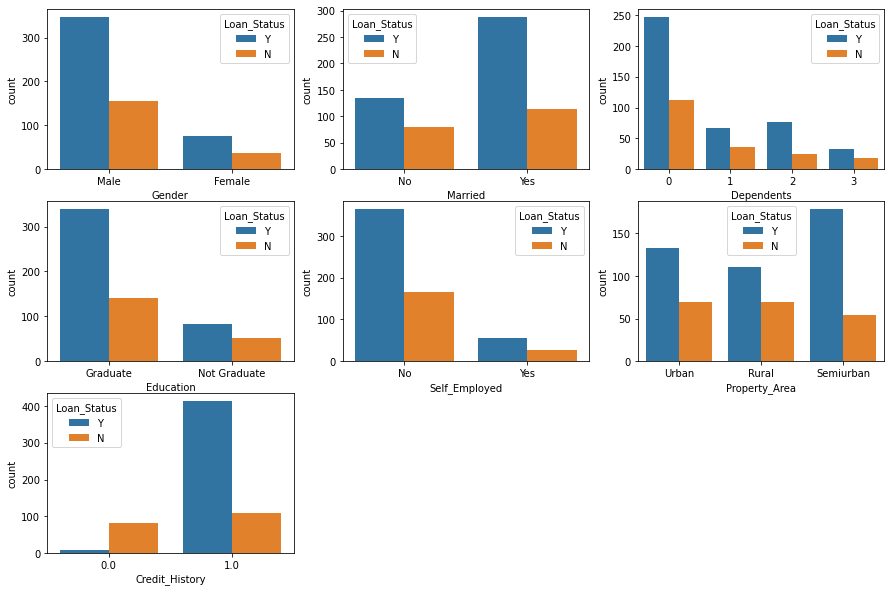

In [32]:
plt.figure(figsize=(15,10))
x = 1
for i in cat:
    plt.subplot(3,3,x)
    countplot(LoanData[i],hue=LoanData["Loan_Status"])
    x = x + 1

In [33]:
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [34]:
FunctionChisq(inpData=LoanData,TargetVariable="Loan_Status",CategoricalVariablesList=cat)

Gender is NOT correlated with Loan_Status | P-Value: 0.7391461310869638
Married is correlated with Loan_Status | P-Value: 0.029608580862582116
Dependents is NOT correlated with Loan_Status | P-Value: 0.3688663081366005
Education is correlated with Loan_Status | P-Value: 0.04309962129357355
Self_Employed is NOT correlated with Loan_Status | P-Value: 0.9710746411403309
Property_Area is correlated with Loan_Status | P-Value: 0.0021360187811644915
Credit_History is correlated with Loan_Status | P-Value: 3.4183499979091188e-40


['Married', 'Education', 'Property_Area', 'Credit_History']

# Defining Predictors and TargetVariable

In [35]:
LoanData.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [36]:
Y = LoanData["Loan_Status"]

In [37]:
X = LoanData.drop(labels=['Gender','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status'],axis = 1)

In [38]:
Y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [39]:
X

,Married,Education,Credit_History,Property_Area
0,No,Graduate,1.0,Urban
1,Yes,Graduate,1.0,Rural
2,Yes,Graduate,1.0,Urban
3,Yes,Not Graduate,1.0,Urban
4,No,Graduate,1.0,Urban
...,...,...,...,...
609,No,Graduate,1.0,Rural
610,Yes,Graduate,1.0,Rural
611,Yes,Graduate,1.0,Urban
612,Yes,Graduate,1.0,Urban


In [40]:
#replacing Married Education columns values with Numeric values as both has only 2 unique values
X["Married"].replace({"Yes":1,"No":0},inplace=True)
X["Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [41]:
X

,Married,Education,Credit_History,Property_Area
0,0,1,1.0,Urban
1,1,1,1.0,Rural
2,1,1,1.0,Urban
3,1,0,1.0,Urban
4,0,1,1.0,Urban
...,...,...,...,...
609,0,1,1.0,Rural
610,1,1,1.0,Rural
611,1,1,1.0,Urban
612,1,1,1.0,Urban


In [42]:
Xnew = pd.get_dummies(X)

In [43]:
Xnew

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,1.0,0,0,1
1,1,1,1.0,1,0,0
2,1,1,1.0,0,0,1
3,1,0,1.0,0,0,1
4,0,1,1.0,0,0,1
...,...,...,...,...,...,...
609,0,1,1.0,1,0,0
610,1,1,1.0,1,0,0
611,1,1,1.0,0,0,1
612,1,1,1.0,0,0,1


# Standardization of Data

In [44]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
Xnew = pd.DataFrame(ss.fit_transform(Xnew),columns=['Married', 'Education', 'Credit_History', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban'])

In [45]:
Xnew

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.372089,0.528362,0.411733,-0.641478,-0.782016,1.428147
1,0.728816,0.528362,0.411733,1.558899,-0.782016,-0.700208
2,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147
3,0.728816,-1.892641,0.411733,-0.641478,-0.782016,1.428147
4,-1.372089,0.528362,0.411733,-0.641478,-0.782016,1.428147
...,...,...,...,...,...,...
609,-1.372089,0.528362,0.411733,1.558899,-0.782016,-0.700208
610,0.728816,0.528362,0.411733,1.558899,-0.782016,-0.700208
611,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147
612,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147


# Splitting Data into Training and Testing 

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(Xnew,Y,random_state=42,test_size=0.3)

# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lrModel = lr.fit(xtrain,ytrain)
#prediction on test data
prediction = lrModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(lrModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=2,criterion="entropy")
dtcModel = dtc.fit(xtrain,ytrain)
#prediction on testing data
prediction = dtcModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(dtcModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


# Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV
tg = {"max_depth": range(1,15,1),"criterion":["gini","entropy"],"n_estimators":range(10,200,10)}
cv = GridSearchCV(rfc,tg,scoring="accuracy",cv=4)
cvModel = cv.fit(Xnew,Y)

In [50]:
cvModel.best_params_

{'criterion': 'gini', 'max_depth': 2, 'n_estimators': 10}

In [51]:
rfc = RandomForestClassifier(max_depth=2,criterion="gini",n_estimators = 20)
rfcModel = rfc.fit(xtrain,ytrain)
#prediction on testing data
prediction = rfcModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(rfcModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.70381232 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


# AdaBoost

In [91]:
from sklearn.ensemble import AdaBoostClassifier
dtc = DecisionTreeClassifier(max_depth=1)
abModel = AdaBoostClassifier(base_estimator=dtc,n_estimators=200,learning_rate=0.01)

abModel = abModel.fit(xtrain,ytrain)
#prediction on testing data
prediction = abModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(abModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


# KNN

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

knnModel = knn.fit(xtrain,ytrain)
#prediction on testing data
prediction = knnModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(knnModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.71858504 0.74638265 0.73991935 0.57164291 0.72783968 0.76412772
 0.84147582 0.80772834 0.80624822 0.77672656]

Final Average Accuracy of the model: 0.75


# Naive Bayes

In [54]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nbModel = nb.fit(xtrain,ytrain)
#prediction on testing data
prediction = knnModel.predict(xtest)

from sklearn.metrics import classification_report,confusion_matrix,f1_score
print(classification_report(ytest,prediction))
print(confusion_matrix(ytest,prediction))

F1_score = f1_score(ytest,prediction,average="weighted")
print("Accuracy on testing sample data : ",round(F1_score,2))

from sklearn.model_selection import cross_val_score
Accuracy_values = cross_val_score(nbModel,Xnew,Y,cv=10,scoring="f1_weighted")
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_values.mean(),2))

              precision    recall  f1-score   support

           N       0.93      0.42      0.57        65
           Y       0.76      0.98      0.86       120

    accuracy                           0.78       185
   macro avg       0.84      0.70      0.71       185
weighted avg       0.82      0.78      0.76       185

[[ 27  38]
 [  2 118]]
Accuracy on testing sample data :  0.76

Accuracy values for 10-fold Cross Validation:
 [0.7736365  0.80345413 0.73991935 0.71603296 0.7558112  0.7558112
 0.85706819 0.84147582 0.77861378 0.81551149]

Final Average Accuracy of the model: 0.78


In [92]:
#creating the final model for predcition using above params
dtc = DecisionTreeClassifier(max_depth=1)
abModel = AdaBoostClassifier(base_estimator=dtc,n_estimators=200,learning_rate=0.01)
abModel = abModel.fit(xtrain,ytrain)

In [95]:
test = pd.read_csv("F:/Course/Pandas/Csv/Loan_Approval_Data.csv")

In [96]:
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [97]:
test1 = test.drop(labels=['Gender','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Loan_Status'],axis = 1)

In [98]:
test1 = test1.drop(labels=["Loan_ID"],axis =1)

In [99]:
#replacing Married Education columns values with Numeric values as both has only 2 unique values
test1["Married"].replace({"Yes":1,"No":0},inplace=True)
test1["Education"].replace({"Graduate":1,"Not Graduate":0},inplace=True)

In [100]:
test1

,Married,Education,Credit_History,Property_Area
0,0.0,1,1.0,Urban
1,1.0,1,1.0,Rural
2,1.0,1,1.0,Urban
3,1.0,0,1.0,Urban
4,0.0,1,1.0,Urban
...,...,...,...,...
609,0.0,1,1.0,Rural
610,1.0,1,1.0,Rural
611,1.0,1,1.0,Urban
612,1.0,1,1.0,Urban


In [101]:
test1.isnull().sum()

Married            3
Education          0
Credit_History    50
Property_Area      0
dtype: int64

In [102]:
test1["Married"] = test1["Married"].fillna(test1["Married"].mode()[0])
test1["Credit_History"] = test1["Credit_History"].fillna(test1["Married"].mode()[0])

In [103]:
testnew = pd.get_dummies(test1)

In [104]:
testnew

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.0,1,1.0,0,0,1
1,1.0,1,1.0,1,0,0
2,1.0,1,1.0,0,0,1
3,1.0,0,1.0,0,0,1
4,0.0,1,1.0,0,0,1
...,...,...,...,...,...,...
609,0.0,1,1.0,1,0,0
610,1.0,1,1.0,1,0,0
611,1.0,1,1.0,0,0,1
612,1.0,1,1.0,0,0,1


In [105]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
testnew = pd.DataFrame(ss.fit_transform(testnew),columns=['Married', 'Education', 'Credit_History', 'Property_Area_Rural','Property_Area_Semiurban', 'Property_Area_Urban'])

In [106]:
testnew

,Married,Education,Credit_History,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,-1.372089,0.528362,0.411733,-0.641478,-0.782016,1.428147
1,0.728816,0.528362,0.411733,1.558899,-0.782016,-0.700208
2,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147
3,0.728816,-1.892641,0.411733,-0.641478,-0.782016,1.428147
4,-1.372089,0.528362,0.411733,-0.641478,-0.782016,1.428147
...,...,...,...,...,...,...
609,-1.372089,0.528362,0.411733,1.558899,-0.782016,-0.700208
610,0.728816,0.528362,0.411733,1.558899,-0.782016,-0.700208
611,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147
612,0.728816,0.528362,0.411733,-0.641478,-0.782016,1.428147


In [107]:
pred_test = abModel.predict(testnew)

In [108]:
T = test[["Loan_ID"]]
T["Loan_Status"] = pred_test

In [109]:
T

,Loan_ID,Loan_Status
0,LP001002,Y
1,LP001003,Y
2,LP001005,Y
3,LP001006,Y
4,LP001008,Y
...,...,...
609,LP002978,Y
610,LP002979,Y
611,LP002983,Y
612,LP002984,Y


In [110]:
T.to_csv("Desktop/Loan_Status_Prediction.csv")